DataSet: ****ATIS Airline Travel Information System****

[https://www.kaggle.com/datasets/hassanamin/atis-airlinetravelinformationsystem](https://www.kaggle.com/datasets/hassanamin/atis-airlinetravelinformationsystem)

In [1]:
import pandas as pd
import numpy as np
np.random.seed(0)

In [3]:
!pip install -q kaggle
!mkdir ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

from google.colab import drive
drive.mount('/content/drive')

#!kaggle datasets list

!kaggle datasets download -d hassanamin/atis-airlinetravelinformationsystem


mkdir: cannot create directory ‘/root/.kaggle’: File exists
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
  0% 0.00/139k [00:00<?, ?B/s]
100% 139k/139k [00:00<00:00, 103MB/s]


In [4]:
!unzip atis-airlinetravelinformationsystem.zip

Archive:  atis-airlinetravelinformationsystem.zip
  inflating: atis_intents.csv        
  inflating: atis_intents_test.csv   
  inflating: atis_intents_train.csv  


In [5]:
data = pd.read_csv("/content/atis_intents.csv",header=None)
data.head()

,0,1
0,atis_flight,i want to fly from boston at 838 am and arriv...
1,atis_flight,what flights are available from pittsburgh to...
2,atis_flight_time,what is the arrival time in san francisco for...
3,atis_airfare,cheapest airfare from tacoma to orlando
4,atis_airfare,round trip fares from pittsburgh to philadelp...


In [6]:
data.shape

(4978, 2)

In [8]:
data.columns = ['intent','text']

In [9]:
data['intent'].unique()

array(['atis_flight', 'atis_flight_time', 'atis_airfare', 'atis_aircraft',
       'atis_ground_service', 'atis_airport', 'atis_airline',
       'atis_distance', 'atis_abbreviation', 'atis_ground_fare',
       'atis_quantity', 'atis_city', 'atis_flight_no', 'atis_capacity',
       'atis_flight#atis_airfare', 'atis_meal', 'atis_restriction',
       'atis_airline#atis_flight_no',
       'atis_ground_service#atis_ground_fare',
       'atis_airfare#atis_flight_time', 'atis_cheapest',
       'atis_aircraft#atis_flight#atis_flight_no'], dtype=object)

In [10]:
data['intent'].nunique()

22

In [11]:
data['intent'] = data['intent'].str.replace('#','_')
data['intent'].unique()

array(['atis_flight', 'atis_flight_time', 'atis_airfare', 'atis_aircraft',
       'atis_ground_service', 'atis_airport', 'atis_airline',
       'atis_distance', 'atis_abbreviation', 'atis_ground_fare',
       'atis_quantity', 'atis_city', 'atis_flight_no', 'atis_capacity',
       'atis_flight_atis_airfare', 'atis_meal', 'atis_restriction',
       'atis_airline_atis_flight_no',
       'atis_ground_service_atis_ground_fare',
       'atis_airfare_atis_flight_time', 'atis_cheapest',
       'atis_aircraft_atis_flight_atis_flight_no'], dtype=object)

In [12]:
data['intent'] = data['intent'].str.replace('atis_','')
data['intent'].unique()

array(['flight', 'flight_time', 'airfare', 'aircraft', 'ground_service',
       'airport', 'airline', 'distance', 'abbreviation', 'ground_fare',
       'quantity', 'city', 'flight_no', 'capacity', 'flight_airfare',
       'meal', 'restriction', 'airline_flight_no',
       'ground_service_ground_fare', 'airfare_flight_time', 'cheapest',
       'aircraft_flight_flight_no'], dtype=object)

In [13]:
data['intent'].value_counts()

flight                        3666
airfare                        423
ground_service                 255
airline                        157
abbreviation                   147
aircraft                        81
flight_time                     54
quantity                        51
flight_airfare                  21
airport                         20
distance                        20
city                            19
ground_fare                     18
capacity                        16
flight_no                       12
meal                             6
restriction                      6
airline_flight_no                2
ground_service_ground_fare       1
airfare_flight_time              1
cheapest                         1
aircraft_flight_flight_no        1
Name: intent, dtype: int64

In [14]:
labels = ['flight','ground_service','airfare','abbreviation','flight_time']

In [15]:
data = data[data["intent"].isin(labels)]
data['intent'].value_counts()

flight            3666
airfare            423
ground_service     255
abbreviation       147
flight_time         54
Name: intent, dtype: int64

In [16]:
sample_data = data.groupby('intent').apply(lambda x: x.sample(n=40)).reset_index(drop = True)
sample_data.intent.value_counts()

abbreviation      40
airfare           40
flight            40
flight_time       40
ground_service    40
Name: intent, dtype: int64

In [17]:
sample_data.to_csv("sample_data.csv",index=False)

In [18]:
sample_data = sample_data[['text','intent']]

In [19]:
sample_data.head()

,text,intent
0,what does mco stand for,abbreviation
1,what does the abbreviation co mean,abbreviation
2,what is hp,abbreviation
3,is fare code b the same as business class,abbreviation
4,what does ewr mean,abbreviation


- How to create Prompt : https://platform.openai.com/docs/guides/fine-tuning

In [20]:
sample_data['text'] = sample_data['text'].str.strip()
sample_data['intent'] = sample_data['intent'].str.strip()

In [21]:
sample_data['text'] = sample_data['text'] + "\n\nIntent:\n\n"
# sample_data['text'] = "Classify text into on the intent: flight, ground_service, airline, aircraft, flight_time. Text: "+sample_data['text'] + "\n\nIntent:\n\n"
sample_data['intent'] = " "+sample_data['intent'] + " END"
sample_data.head()

,text,intent
0,what does mco stand for\n\nIntent:\n\n,abbreviation END
1,what does the abbreviation co mean\n\nIntent:\n\n,abbreviation END
2,what is hp\n\nIntent:\n\n,abbreviation END
3,is fare code b the same as business class\n\nI...,abbreviation END
4,what does ewr mean\n\nIntent:\n\n,abbreviation END


In [22]:
print(sample_data['text'][0])

what does mco stand for

Intent:




In [23]:
print(sample_data['intent'][0])

 abbreviation END


In [24]:
sample_data.columns = ['prompt','completion']

In [25]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_json.html

sample_data.to_json("intent_sample.jsonl", orient='records', lines=True)

In [26]:
# sample_data.to_json("intent_.json", orient='records')

In [27]:
!pip install --upgrade openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 7.9 MB/s eta 0:00:00


In [26]:
!openai tools fine_tunes.prepare_data -f intent_sample.jsonl

Analyzing...

- Your file contains 200 prompt-completion pairs
- Based on your data it seems like you're trying to fine-tune a model for classification
- For classification, we recommend you try one of the faster and cheaper models, such as `ada`
- For classification, you can estimate the expected model performance by keeping a held out dataset, which is not used for training
- There are 7 duplicated prompt-completion sets. These are rows: [7, 11, 12, 26, 29, 32, 140]
- All prompts end with suffix `\n\nIntent:\n\n`. This suffix seems very long. Consider replacing with a shorter suffix, such as `\n\n###\n\n`

Based on the analysis we will perform the following actions:
- [Recommended] Remove 7 duplicate rows [Y/n]: Y
- [Recommended] Would you like to split into training and validation set? [Y/n]: Y


Your data will be written to a new JSONL file. Proceed [Y/n]: Y

Wrote modified files to `intent_sample_prepared_train.jsonl` and `intent_sample_prepared_valid.jsonl`
Feel free to take a lo

In [28]:
from google.colab import drive
drive.mount('/content/drive')

import configparser

config = configparser.ConfigParser()
config.read('/content/drive/MyDrive/openapi.txt')
secret_key = config['global']['OPENAI_API_KEY']

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
import os
os.environ['OPENAI_API_KEY'] = secret_key

In [30]:
!openai api fine_tunes.list > process.json

In [32]:
!openai api fine_tunes.create -t "intent_sample_prepared_train.jsonl" -v "intent_sample_prepared_valid.jsonl" -m 'davinci'

#Model	Training	Usage
#Ada	$0.0004 / 1K tokens	$0.0016 / 1K tokens
#Babbage	$0.0006 / 1K tokens	$0.0024 / 1K tokens
#Curie	$0.0030 / 1K tokens	$0.0120 / 1K tokens
#Davinci	$0.0300 / 1K tokens	$0.1200 / 1K tokens


Found potentially duplicated files with name 'intent_sample_prepared_train.jsonl', purpose 'fine-tune' and size 18369 bytes
file-cD0S1TBxrAFhkMXqTa07Dgm6
file-Mz9lUU7kU9f5fSS44zrjgc9U
file-pwBmOHya9WPYaZGJoDFk0CrD
file-94LWVxK53Y8c8NleO9mnGQIa
file-zmDkK7AAWDLvwe0pFMutSdy6
Enter file ID to reuse an already uploaded file, or an empty string to upload this file anyway: file-cD0S1TBxrAFhkMXqTa07Dgm6
Reusing already uploaded file: file-cD0S1TBxrAFhkMXqTa07Dgm6
Found potentially duplicated files with name 'intent_sample_prepared_valid.jsonl', purpose 'fine-tune' and size 4774 bytes
file-kqduUSzdc3qNPnFCt5y5h2xp
file-B9CfcjiaxZeatkDhkQEaByNh
file-obj54QVOnSAzhw5NzcJOoMxL
file-sWxJ1uOOTVBUwhUl8KFxwrpV
file-1Ywyt8k6w9jVznPNPei2Ns91
Enter file ID to reuse an already uploaded file, or an empty string to upload this file anyway: file-kqduUSzdc3qNPnFCt5y5h2xp
Reusing already uploaded file: file-kqduUSzdc3qNPnFCt5y5h2xp
Created fine-tune: ft-mBALv3KtgV5CtW5LvMnpwKBh
Streaming events until fine-tuni

In [33]:
!openai api fine_tunes.follow -i ft-mBALv3KtgV5CtW5LvMnpwKBh


[2023-06-29 14:41:46] Created fine-tune: ft-mBALv3KtgV5CtW5LvMnpwKBh

Stream interrupted (client disconnected).
To resume the stream, run:

  openai api fine_tunes.follow -i ft-mBALv3KtgV5CtW5LvMnpwKBh



In [31]:
process = pd.read_json('process.json')

model_names={}
for d  in process.data:
  print (d['object'], d['id'], d['fine_tuned_model'])
  if d['fine_tuned_model'] is not None:
    model_names[d['id']] = d['fine_tuned_model']


fine-tune ft-d18B5lup7ze7wPrEueVORG0I ada:ft-personal-2022-12-11-13-48-08
fine-tune ft-RgT5ThiC2XcV1MmxmwpCpaqP ada:ft-personal-2022-12-11-14-00-46
fine-tune ft-e74hE3BvWvuVq1qnvjZ7pybd ada:ft-personal-2022-12-11-15-15-20
fine-tune ft-l5I75CeppEBr0EUQqmqpuivJ davinci:ft-dasarpai-2023-06-29-15-18-13
fine-tune ft-KigtXKD2nrqNf09O4B7U0Mu8 davinci:ft-dasarpai-2023-06-29-16-15-38
fine-tune ft-Mr2Lt4PLvwuNOyLS72PpTzJ6 davinci:ft-dasarpai-2023-06-29-17-01-46
fine-tune ft-3Ud6bmLqt7VV0614thhimtM4 davinci:ft-dasarpai-2023-06-29-18-22-11
fine-tune ft-lborLCHs40BUsNJHZLE94GR0 davinci:ft-dasarpai-2023-06-29-19-41-55
fine-tune ft-tySAL3H9pT3maIjJfR4BKF8B davinci:ft-dasarpai-2023-06-29-20-04-01
fine-tune ft-mBALv3KtgV5CtW5LvMnpwKBh ada:ft-dasarpai-2023-06-29-15-41-13


In [32]:
# Model Created

model_names

{'ft-d18B5lup7ze7wPrEueVORG0I': 'ada:ft-personal-2022-12-11-13-48-08',
 'ft-RgT5ThiC2XcV1MmxmwpCpaqP': 'ada:ft-personal-2022-12-11-14-00-46',
 'ft-e74hE3BvWvuVq1qnvjZ7pybd': 'ada:ft-personal-2022-12-11-15-15-20',
 'ft-l5I75CeppEBr0EUQqmqpuivJ': 'davinci:ft-dasarpai-2023-06-29-15-18-13',
 'ft-KigtXKD2nrqNf09O4B7U0Mu8': 'davinci:ft-dasarpai-2023-06-29-16-15-38',
 'ft-Mr2Lt4PLvwuNOyLS72PpTzJ6': 'davinci:ft-dasarpai-2023-06-29-17-01-46',
 'ft-3Ud6bmLqt7VV0614thhimtM4': 'davinci:ft-dasarpai-2023-06-29-18-22-11',
 'ft-lborLCHs40BUsNJHZLE94GR0': 'davinci:ft-dasarpai-2023-06-29-19-41-55',
 'ft-tySAL3H9pT3maIjJfR4BKF8B': 'davinci:ft-dasarpai-2023-06-29-20-04-01',
 'ft-mBALv3KtgV5CtW5LvMnpwKBh': 'ada:ft-dasarpai-2023-06-29-15-41-13'}

In [ ]:
# !openai api fine_tunes.results -i ft-d18B5lup7ze7wPrEueVORG0I > result1.csv
# !openai api fine_tunes.results -i ft-RgT5ThiC2XcV1MmxmwpCpaqP > result2.csv
# !openai api fine_tunes.results -i ft-e74hE3BvWvuVq1qnvjZ7pybd > result3.csv
!openai api fine_tunes.results -i ft-l5I75CeppEBr0EUQqmqpuivJ > result4.csv
!openai api fine_tunes.results -i ft-mBALv3KtgV5CtW5LvMnpwKBh > result5.csv


In [98]:
results4 = pd.read_csv('result4.csv')
results4[results4['validation_token_accuracy'].notnull()].tail(1)

,step,elapsed_tokens,elapsed_examples,training_loss,training_sequence_accuracy,training_token_accuracy,validation_loss,validation_sequence_accuracy,validation_token_accuracy
616,617,15873,617,0.002637,1.0,1.0,0.006313,1.0,1.0


In [103]:
results5 = pd.read_csv('result5.csv')
results5[results5['validation_token_accuracy'].notnull()].tail(1)

,step,elapsed_tokens,elapsed_examples,training_loss,training_sequence_accuracy,training_token_accuracy,validation_loss,validation_sequence_accuracy,validation_token_accuracy
616,617,15865,617,0.006291,1.0,1.0,0.08526,0.0,0.75


In [100]:
results4

,step,elapsed_tokens,elapsed_examples,training_loss,training_sequence_accuracy,training_token_accuracy,validation_loss,validation_sequence_accuracy,validation_token_accuracy
0,1,33,1,1.750577,0.0,0.000000,2.234914,0.0,0.0
1,2,58,2,2.209452,0.0,0.000000,NaN,NaN,NaN
2,3,83,3,1.847109,0.0,0.250000,NaN,NaN,NaN
3,4,108,4,1.940626,0.0,0.000000,NaN,NaN,NaN
4,5,133,5,1.458964,0.0,0.333333,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
613,614,15790,614,0.006528,1.0,1.000000,NaN,NaN,NaN
614,615,15823,615,0.006387,1.0,1.000000,NaN,NaN,NaN
615,616,15848,616,0.006952,1.0,1.000000,NaN,NaN,NaN
616,617,15873,617,0.002637,1.0,1.000000,0.006313,1.0,1.0


<Axes: >

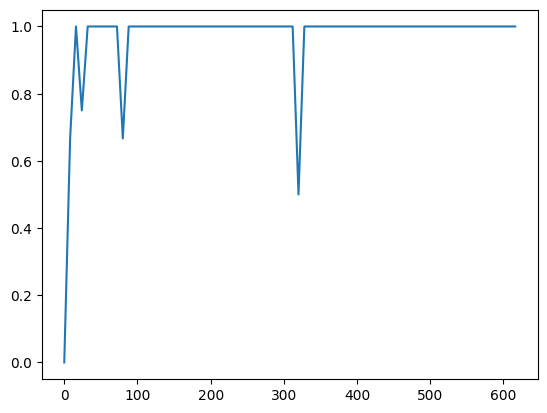

In [101]:
results4[results4['validation_token_accuracy'].notnull()]['validation_token_accuracy'].plot()

In [82]:
prompt = "Do we have london flight on Monday\n\nIntent:\n\n"
# prompt = "what is the ap57 restriction\n\nIntent:\n\n"
#prompt = "show me ground transportation in baltimore\n\nIntent:\n\n"

In [105]:
import openai
# openai.api_key ='key'
ft_model= "davinci:ft-dasarpai-2023-06-29-15-18-13"
response = openai.Completion.create(
  model=ft_model,
  prompt=prompt,
  max_tokens=5,
  temperature=0,
  top_p=1,
  frequency_penalty=0,
  presence_penalty=0,
  stop=[" END"]
)
print(response['choices'][0]['text'])

 flight


In [112]:
test = pd.read_json('/content/intent_sample_prepared_valid.jsonl', orient='records', lines=True )
#test.columns=['intent','prompt']
test

,prompt,completion
0,what does the abbreviation co mean\n\nIntent:\n\n,abbreviation END
1,what does the meal code s stand for\n\nIntent:...,abbreviation END
2,what is mia\n\nIntent:\n\n,abbreviation END
3,define airline ua\n\nIntent:\n\n,abbreviation END
4,what is your least expensive fare between atla...,airfare END
5,can you show me the price of a flight to washi...,airfare END
6,show me fares from houston to las vegas\n\nInt...,airfare END
7,please show me all fares for flights from denv...,airfare END
8,how much does it cost to fly directly from phi...,airfare END
9,round trip fares from baltimore to philadelphi...,airfare END


In [115]:
res = openai.Completion.create(model=ft_model, prompt=test['prompt'][0], max_tokens=1, temperature=0, logprobs=2)
res['choices'][0]['logprobs']['top_logprobs'][0]

<OpenAIObject at 0x7ff4d6646160> JSON: {
  " abbre": -1.8073477e-05,
  " acronym": -11.938894
}

In [116]:
res = openai.Completion.create(model=ft_model, prompt=test['prompt'][4], max_tokens=1, temperature=0, logprobs=2)
res['choices'][0]['logprobs']['top_logprobs'][0]

<OpenAIObject at 0x7ff4d6535850> JSON: {
  " air": -0.000114638155,
  " flight": -9.842382
}

In [94]:
model_names

{'ft-d18B5lup7ze7wPrEueVORG0I': 'ada:ft-personal-2022-12-11-13-48-08',
 'ft-RgT5ThiC2XcV1MmxmwpCpaqP': 'ada:ft-personal-2022-12-11-14-00-46',
 'ft-e74hE3BvWvuVq1qnvjZ7pybd': 'ada:ft-personal-2022-12-11-15-15-20',
 'ft-l5I75CeppEBr0EUQqmqpuivJ': 'davinci:ft-dasarpai-2023-06-29-15-18-13',
 'ft-mBALv3KtgV5CtW5LvMnpwKBh': 'ada:ft-dasarpai-2023-06-29-15-41-13'}

In [ ]:
!openai api fine_tunes.list

In [121]:
!openai api fine_tunes.list_snapshots -t ft-RgT5ThiC2XcV1MmxmwpCpaqP

usage: openai api
       [-h]
       {engines.list,engines.get,engines.update,engines.generate,chat_completions.create,completions.create,deployments.list,deployments.get,deployments.delete,deployments.create,models.list,models.get,models.delete,files.create,files.get,files.delete,files.list,fine_tunes.list,fine_tunes.create,fine_tunes.get,fine_tunes.results,fine_tunes.events,fine_tunes.follow,fine_tunes.cancel,fine_tunes.delete,image.create,image.create_edit,image.create_variation,audio.transcribe,audio.translate}
       ...
openai api: error: argument {engines.list,engines.get,engines.update,engines.generate,chat_completions.create,completions.create,deployments.list,deployments.get,deployments.delete,deployments.create,models.list,models.get,models.delete,files.create,files.get,files.delete,files.list,fine_tunes.list,fine_tunes.create,fine_tunes.get,fine_tunes.results,fine_tunes.events,fine_tunes.follow,fine_tunes.cancel,fine_tunes.delete,image.create,image.create_edit,image.create_

In [123]:
!openai api fine_tunes.list_snapshots -t ft-RgT5ThiC2XcV1MmxmwpCpaqP

usage: openai api
       [-h]
       {engines.list,engines.get,engines.update,engines.generate,chat_completions.create,completions.create,deployments.list,deployments.get,deployments.delete,deployments.create,models.list,models.get,models.delete,files.create,files.get,files.delete,files.list,fine_tunes.list,fine_tunes.create,fine_tunes.get,fine_tunes.results,fine_tunes.events,fine_tunes.follow,fine_tunes.cancel,fine_tunes.delete,image.create,image.create_edit,image.create_variation,audio.transcribe,audio.translate}
       ...
openai api: error: argument {engines.list,engines.get,engines.update,engines.generate,chat_completions.create,completions.create,deployments.list,deployments.get,deployments.delete,deployments.create,models.list,models.get,models.delete,files.create,files.get,files.delete,files.list,fine_tunes.list,fine_tunes.create,fine_tunes.get,fine_tunes.results,fine_tunes.events,fine_tunes.follow,fine_tunes.cancel,fine_tunes.delete,image.create,image.create_edit,image.create_

In [120]:
!openai api fine_tunes.download_snapshot -t ft-l5I75CeppEBr0EUQqmqpuivJ -s ft-l5I75CeppEBr0EUQqmqpuivJ -o .

usage: openai api
       [-h]
       {engines.list,engines.get,engines.update,engines.generate,chat_completions.create,completions.create,deployments.list,deployments.get,deployments.delete,deployments.create,models.list,models.get,models.delete,files.create,files.get,files.delete,files.list,fine_tunes.list,fine_tunes.create,fine_tunes.get,fine_tunes.results,fine_tunes.events,fine_tunes.follow,fine_tunes.cancel,fine_tunes.delete,image.create,image.create_edit,image.create_variation,audio.transcribe,audio.translate}
       ...
openai api: error: argument {engines.list,engines.get,engines.update,engines.generate,chat_completions.create,completions.create,deployments.list,deployments.get,deployments.delete,deployments.create,models.list,models.get,models.delete,files.create,files.get,files.delete,files.list,fine_tunes.list,fine_tunes.create,fine_tunes.get,fine_tunes.results,fine_tunes.events,fine_tunes.follow,fine_tunes.cancel,fine_tunes.delete,image.create,image.create_edit,image.create_

In [36]:
context = """Tokyo was selected as the host city during the 125th IOC Session in Buenos Aires, Argentina, on 7
September 2013. Originally scheduled to take place from 24 July to 9 August 2020, the event was postponed to 2021 in
March 2020 as a result of the COVID-19 pandemic, the first such instance in the history of the Olympic Games
(previous games had been cancelled but not rescheduled). However, the event retained the Tokyo 2020 name for marketing and
branding purposes. It was largely held behind closed doors with no public
spectators permitted due to the declaration of a state of emergency in the Greater
Tokyo Area in response to the pandemic. The Summer Paralympics were held between 24 August and 5 September 2021,
16 days after the completion of the Olympics.The 2020 Games were the fourth Olympic Games to be held in Japan,
following the Tokyo 1964 (Summer), Sapporo 1972 (Winter) and Nagano 1998 (Winter) games. Tokyo is the first city
in Asia to hold the Summer Games twice. The 2020 Games were the second of three consecutive Olympics to be held in East Asia,
following the 2018 Winter Olympics in Pyeongchang, South Korea and preceding the 2022 Winter Olympics in Beijing, China."""

p = f"Write questions based on the text below\n\nText: {context}\n\nQuestions:\n1. Question1\n2. Question2\n3. Question3",
ans =

('Write questions based on the text below\n\nText: Tokyo was selected as the host city during the 125th IOC Session in Buenos Aires, Argentina, on 7 \nSeptember 2013. Originally scheduled to take place from 24 July to 9 August 2020, the event was postponed to 2021 in \nMarch 2020 as a result of the COVID-19 pandemic, the first such instance in the history of the Olympic Games \n(previous games had been cancelled but not rescheduled). However, the event retained the Tokyo 2020 name for marketing and \nbranding purposes. It was largely held behind closed doors with no public \nspectators permitted due to the declaration of a state of emergency in the Greater \nTokyo Area in response to the pandemic. The Summer Paralympics were held between 24 August and 5 September 2021, \n16 days after the completion of the Olympics.The 2020 Games were the fourth Olympic Games to be held in Japan, \nfollowing the Tokyo 1964 (Summer), Sapporo 1972 (Winter) and Nagano 1998 (Winter) games. Tokyo is the fir

In [50]:
import pandas as pd

df = pd.DataFrame()
df['question']=''
df['answer']=''

df.loc[1,'question'] = q
df['question'] = "1. "+ df.question
df


TypeError: ignored

In [47]:
df

,question,answer
1,(Write questions based on the text below\n\nTe...,NaN


In [43]:
df

,question,answer
1,some text is here,NaN


In [ ]:
df_qa = pd.read_csv(r'/content/drive/MyDrive/DS-Data/olympics_qa.csv')


In [58]:
df1 = pd.read_json(r'/content/drive/MyDrive/DS-Data/olympics_search.jsonl', orient='records', lines=True)

In [ ]:
df1

In [60]:
df2 = pd.read_csv(r'/content/drive/MyDrive/DS-Data/olympics_sections.csv')
df2

,title,heading,content,tokens
0,2020 Summer Olympics,Summary,The 2020 Summer Olympics (Japanese: 2020年夏季オリン...,716
1,2020 Summer Olympics,Host city selection,The International Olympic Committee (IOC) vote...,126
2,2020 Summer Olympics,Impact of the COVID-19 pandemic,"In January 2020, concerns were raised about th...",375
3,2020 Summer Olympics,Qualifying event cancellation and postponement,Concerns about the pandemic began to affect qu...,298
4,2020 Summer Olympics,Effect on doping tests,Mandatory doping tests were being severely res...,163
...,...,...,...,...
3925,Tunisia at the 2020 Summer Olympics,Taekwondo,Tunisia entered one athlete into the taekwondo...,60
3926,Tunisia at the 2020 Summer Olympics,Tennis,Tunisia entered one tennis player into the Oly...,65
3927,Tunisia at the 2020 Summer Olympics,Men's tournament,Tunisia men's volleyball team qualified for th...,80
3928,Tunisia at the 2020 Summer Olympics,Weightlifting,Tunisia entered five weightlifters (three men ...,140
